**Defining the Question.**

**a) Specifying the Question**

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables


**b) Defining the Metric for Success**

Analyze the data. Normalize the data.Create models to depict accuracy.

**c) Understanding the context**

The data contains one dataset with the prices of houses from 1900 to 2015. It has 20 columns that contain variables that will be used to predict sale of prices of the houses

Task to predict the sale of prices (houses) in the near future.

**d) Recording the Experimental Design**

(CRISP- DM) 

Data mining

Understanding the data

Clean the data

Explore the data

Create models

Evaluate model perfomance

In [0]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score



In [0]:
#loading the house dataset
house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

In [0]:
#loading the 1st five rows
house.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#loading the last five rows
house.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
#checking for the data types
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
house.info

<bound method DataFrame.info of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 co

In [0]:
house.shape

(21613, 20)

In [0]:
#Check missing values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**EDA ANALYSIS**

In [0]:
#Checking for duplicates
house.duplicated().sum()

3

In [0]:
#Dataset has 3 duplicate rows. We need to drop these.
house.drop_duplicates(keep=False,inplace=True) 
house.duplicated().sum()

0

In [0]:
# central tendency
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,4.580020e+09,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,47.560045,-122.213923,1986.484889,12769.608460
std,2.876528e+09,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,0.138580,0.140837,685.460263,27307.765664
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
                       #Checking for anomalies
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

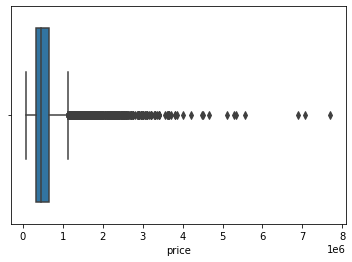

In [0]:
sns.boxplot(x=house['price'])

The dataset has houses that prices are very high so we will not deal with the outliers


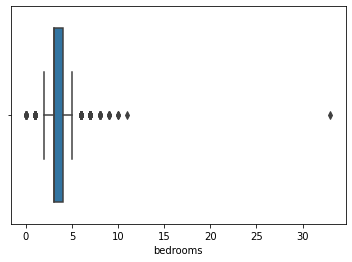

In [0]:
sns.boxplot(x=house['bedrooms'])

In [0]:
#View the row that has the outlier 
#we are trying to filter out the outlier
df = house[house["bedrooms"] >= 15]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


The row has a house with 33 beadrooms,with one bathrooms,in grade 7 and the price is moderate, so we will drop this row so it doesnt affect our data analysis later


In [0]:
#drop data by index number
house1=house.drop(house.index[15870])
house1.shape

(21606, 20)

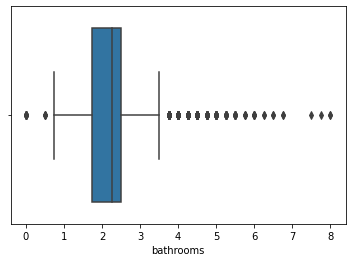

In [0]:
sns.boxplot(x=house['bathrooms'])

 **UNIVARIATE ANALYSIS**

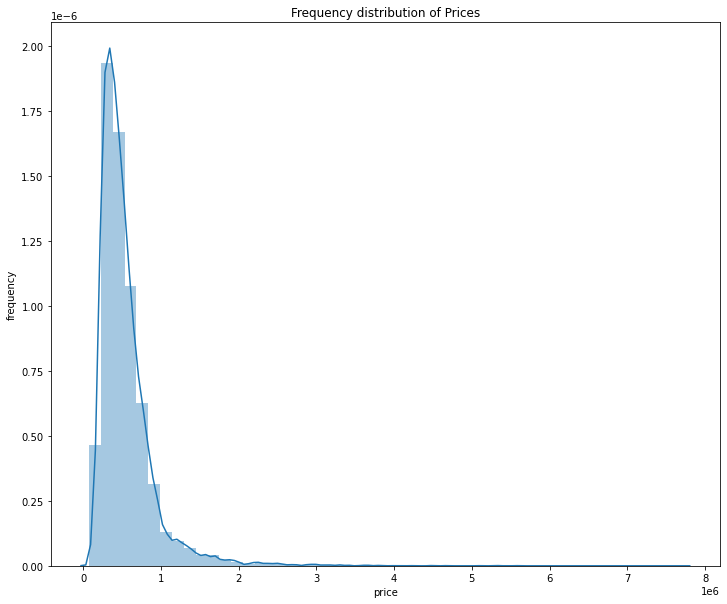

In [0]:
#  A view of the home variables using distribtion plot
plt.figure(figsize = (12,10))
plt.tight_layout()
sns.distplot(house1['price']) 
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Frequency distribution of Prices')
plt.show()

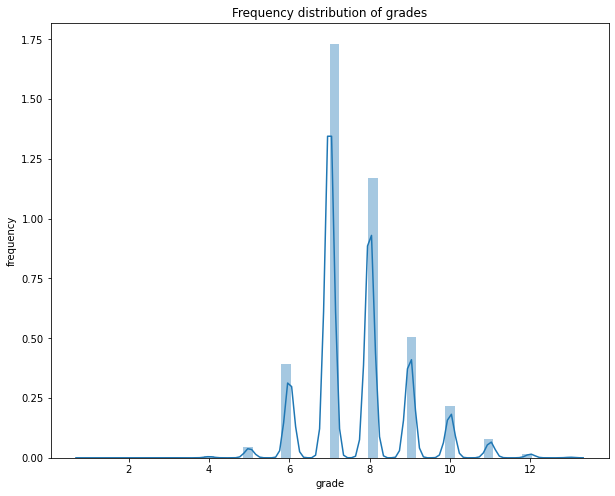

In [0]:
#  A view of the house grades using distribtion plot
plt.figure(figsize = (10,8))
plt.tight_layout()
sns.distplot(house1['grade']) 
plt.xlabel('grade')
plt.ylabel('frequency')
plt.title('Frequency distribution of grades')
plt.show()

Most houses are in grade 7 


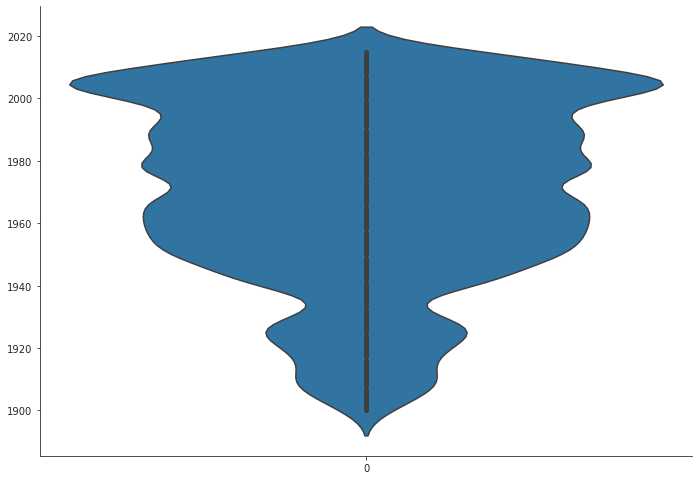

In [0]:
# plot using subplots
sns.set_style('ticks')
fig, ax = plt.subplots()

#  Setting of the size 
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=house1['yr_built'], inner="points", ax=ax)    
sns.despine()

Most houses were builts in 2015



**BIVARIATE ANALYSIS**

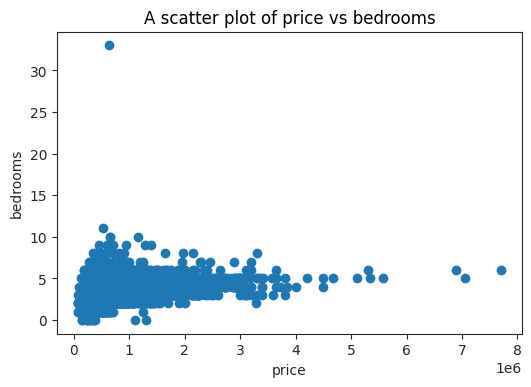

In [0]:
#scatter plot
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(house1['price'], house1['bedrooms'])

# Giving the scatterplot a title
plt.title('A scatter plot of price vs bedrooms', color = 'black')

# Labelling the x -axis
plt.xlabel('price')

# Labelling the y- axis
plt.ylabel('bedrooms')

# We then display our scatterplot 
plt.show()

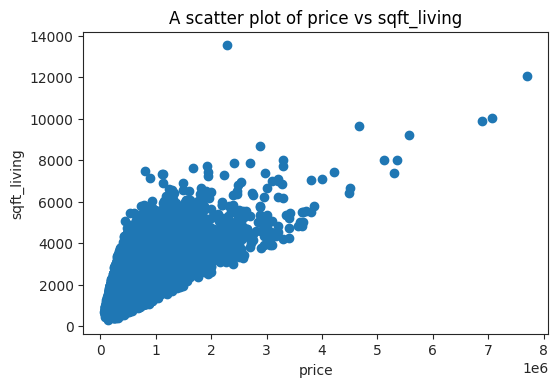

In [0]:

#scatter plot
plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(house1['price'], house1['sqft_living'])

# Giving the scatterplot a title
plt.title('A scatter plot of price vs sqft_living', color = 'black')

# Labelling the x -axis
plt.xlabel('price')

# Labelling the y- axis
plt.ylabel('sqft_living')

# We then display our scatterplot 
plt.show()

The scatter plot shows a positivecorrelation,as the increase in the sqft_ living increases the house prices



**Multivariate analysis**

In [0]:
print(house1[['floors','bedrooms','sqft_living']].sort_values('floors',ascending=False).head(10))

print('**')


print('Highest floor is',house1['floors'].max())

       floors  bedrooms  sqft_living
15424     3.5         2         1730
14885     3.5         3         1730
11594     3.5         3         1760
875       3.5         0         3064
18477     3.5         8         7710
20308     3.5         2         1310
20772     3.5         3         1400
10077     3.5         3         1440
20546     3.0         3         1300
20554     3.0         3         1408
**
Highest floor is 3.5


In [0]:
house1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016944,0.001439,0.005018,-0.012285,-0.132105,0.018481,-0.003244,0.011762,-0.023562,0.007967,-0.010880,-0.005137,0.021042,-0.016460,-0.007992,-0.001892,0.020770,-0.002932,-0.138772
price,-0.016944,1.000000,0.308468,0.525224,0.702028,0.089652,0.256977,0.265662,0.397228,0.036493,0.667418,0.605668,0.323625,0.053948,0.126617,-0.053043,0.306820,0.021614,0.585284,0.082442
bedrooms,0.001439,0.308468,1.000000,0.515992,0.576732,0.031699,0.175454,-0.006392,0.079470,0.028361,0.357110,0.477642,0.303157,0.154380,0.018546,-0.152794,-0.008951,0.129468,0.391707,0.029226
bathrooms,0.005018,0.525224,0.515992,1.000000,0.754734,0.087759,0.500703,0.063852,0.188110,-0.124894,0.665042,0.685359,0.283882,0.505973,0.051022,-0.203792,0.024597,0.223055,0.568736,0.087205
sqft_living,-0.012285,0.702028,0.576732,0.754734,1.000000,0.172831,0.354040,0.103397,0.284523,-0.058746,0.762709,0.876635,0.434984,0.318144,0.055281,-0.199392,0.052431,0.240254,0.756394,0.183277
sqft_lot,-0.132105,0.089652,0.031699,0.087759,0.172831,1.000000,-0.005134,0.021562,0.074793,-0.008971,0.113660,0.183540,0.015236,0.053128,0.007713,-0.129643,-0.085693,0.229587,0.144628,0.718555
floors,0.018481,0.256977,0.175454,0.500703,0.354040,-0.005134,1.000000,0.024284,0.029431,-0.263824,0.458255,0.523881,-0.245575,0.489399,0.005964,-0.058972,0.049631,0.125254,0.279959,-0.011221
waterfront,-0.003244,0.265662,-0.006392,0.063852,0.103397,0.021562,0.024284,1.000000,0.400964,0.017038,0.081994,0.072221,0.079447,-0.026400,0.093412,0.030860,-0.015018,-0.041840,0.085642,0.030659
view,0.011762,0.397228,0.079470,0.188110,0.284523,0.074793,0.029431,0.400964,1.000000,0.045852,0.251145,0.167726,0.276649,-0.053118,0.102603,0.085111,0.005644,-0.078685,0.280081,0.072563
condition,-0.023562,0.036493,0.028361,-0.124894,-0.058746,-0.008971,-0.263824,0.017038,0.045852,1.000000,-0.144592,-0.158208,0.174143,-0.361273,-0.061113,0.002871,-0.014964,-0.106536,-0.092833,-0.003436


In [0]:
final_df= house1.drop(["id","zipcode","lat","long","sqft_living","sqft_lot","sqft_above"],axis=1)
final_df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,0,1955,0,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,400,1951,1991,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,0,1933,0,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,910,1965,0,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,0,1987,0,1800,7503


**Multicolinearity**

In [0]:

# Find the correlation of the variables
correlation=final_df.corr()
correlation

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308468,0.525224,0.256977,0.265662,0.397228,0.036493,0.667418,0.323625,0.053948,0.126617,0.585284,0.082442
bedrooms,0.308468,1.000000,0.515992,0.175454,-0.006392,0.079470,0.028361,0.357110,0.303157,0.154380,0.018546,0.391707,0.029226
bathrooms,0.525224,0.515992,1.000000,0.500703,0.063852,0.188110,-0.124894,0.665042,0.283882,0.505973,0.051022,0.568736,0.087205
floors,0.256977,0.175454,0.500703,1.000000,0.024284,0.029431,-0.263824,0.458255,-0.245575,0.489399,0.005964,0.279959,-0.011221
waterfront,0.265662,-0.006392,0.063852,0.024284,1.000000,0.400964,0.017038,0.081994,0.079447,-0.026400,0.093412,0.085642,0.030659
view,0.397228,0.079470,0.188110,0.029431,0.400964,1.000000,0.045852,0.251145,0.276649,-0.053118,0.102603,0.280081,0.072563
condition,0.036493,0.028361,-0.124894,-0.263824,0.017038,0.045852,1.000000,-0.144592,0.174143,-0.361273,-0.061113,-0.092833,-0.003436
grade,0.667418,0.357110,0.665042,0.458255,0.081994,0.251145,-0.144592,1.000000,0.168295,0.446982,0.014351,0.713160,0.119271
sqft_basement,0.323625,0.303157,0.283882,-0.245575,0.079447,0.276649,0.174143,0.168295,1.000000,-0.133058,0.071353,0.200179,0.017216
yr_built,0.053948,0.154380,0.505973,0.489399,-0.026400,-0.053118,-0.361273,0.446982,-0.133058,1.000000,-0.224581,0.326370,0.071036


In [0]:
#Compute the variation inflation factor
vif_data = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif_data

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,2.676479,0.088343,-0.510545,-0.192960,-0.385865,-0.234287,-0.086015,-1.325992,-0.259261,0.834933,-0.035059,-0.447172,0.033155
bedrooms,0.088343,1.484855,-0.708720,-0.015781,0.027980,0.118599,-0.061798,0.010590,-0.226717,0.183909,0.035057,-0.297536,0.045079
bathrooms,-0.510545,-0.708720,3.115490,-0.757037,0.054377,0.014931,-0.111148,-0.424711,-0.672233,-0.983811,-0.257316,-0.237044,-0.042958
floors,-0.192960,-0.015781,-0.757037,1.904907,0.012574,-0.039885,0.141662,-0.363535,0.705536,-0.331211,-0.056131,0.244102,0.117218
waterfront,-0.385865,0.027980,0.054377,0.012574,1.255227,-0.456861,-0.003087,0.207464,0.066076,-0.134427,-0.062625,0.085009,-0.010366
view,-0.234287,0.118599,0.014931,-0.039885,-0.456861,1.421713,-0.000036,-0.055871,-0.261047,0.123623,-0.029417,-0.207763,-0.034391
condition,-0.086015,-0.061798,-0.111148,0.141662,-0.003087,-0.000036,1.224088,0.036560,-0.072966,0.443134,0.196524,0.060678,-0.022753
grade,-1.325992,0.010590,-0.424711,-0.363535,0.207464,-0.055871,0.036560,3.433185,0.001108,-0.702630,-0.030171,-1.099548,-0.018138
sqft_basement,-0.259261,-0.226717,-0.672233,0.705536,0.066076,-0.261047,-0.072966,0.001108,1.600277,0.185498,0.010603,0.094697,0.052914
yr_built,0.834933,0.183909,-0.983811,-0.331211,-0.134427,0.123623,0.443134,-0.702630,0.185498,2.246344,0.471284,-0.148896,-0.050829


All the variables have VIF of less than 5 hence can be used for prediction.

**PCA ANALYSIS**

In [0]:
final_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# obtaining the attributes and the label
X = final_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']].values
y = np.log(final_df['price'])

In [0]:
# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
##Standardizing. StandardScaler subtracts the mean from each features and then scale to unit variance.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
print(pca.components_)


[[ 6.65154595e-07  2.21976668e-06 -2.53167844e-07  9.58114445e-08
   2.00548846e-06 -1.53911324e-07  4.99461570e-06  1.42324752e-04
   7.25930768e-05  7.79138535e-05  4.38873311e-03  9.99990354e-01]
 [-5.76899504e-04 -6.59764678e-04 -1.90819654e-04 -1.11428408e-05
  -3.30177361e-04  6.31167701e-05 -1.20609394e-03 -2.12338072e-01
  -1.25419294e-02 -4.76532316e-03 -9.77093395e-01  4.31975501e-03]
 [ 3.38247469e-04  1.79968581e-04 -3.87475819e-04  1.69046210e-05
   3.62294706e-04  2.45271445e-04 -1.51727854e-04  8.89184937e-01
  -2.06373987e-02  4.13406650e-01 -1.94982530e-01  6.98467372e-04]
 [-1.62271661e-04 -8.12559182e-06  2.17823127e-04  1.26660895e-05
   8.30700666e-06 -2.47374644e-04  1.13309770e-04 -4.05097960e-01
  -7.74711965e-03  9.10401560e-01  8.36918834e-02 -3.80020487e-04]
 [-3.13507698e-03 -1.18512427e-02 -7.92161302e-03  7.18957925e-05
   2.51799806e-03  8.53406539e-03 -1.11396682e-02 -1.25511314e-02
  -9.99469866e-01 -1.55243203e-02  1.56573088e-02  6.91308784e-06]
 [ 7.

In [0]:
#Perform the pca 
pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
#Get the explained variance ratio
## The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 

pca.explained_variance_ratio_

array([9.98948705e-01, 6.03168505e-04, 2.44592975e-04, 2.02630913e-04,
       8.98812034e-07, 1.08073372e-09, 8.29499314e-10, 5.89706504e-10,
       4.50172720e-10, 2.93785552e-10, 1.61689750e-10, 8.24294210e-12])

**Multiple Linear Regression**

In [0]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Check the intercept
regressor.intercept_

13.048026370677327

In [0]:
#Check the coefficient
regressor.coef_

array([ 1.72716772e-06, -4.89377057e-04,  1.71994970e-04,  7.01055961e-05,
        1.28197359e-03,  1.83684095e-01, -2.05773868e-01, -5.86577382e-02,
       -4.11755189e-02, -6.01518152e-02,  4.52622661e-02,  3.65357127e-01])

In [0]:
# model prediction
y_pred = regressor.predict(X_test)
y_pred

array([12.93898854, 12.88680052, 12.78560282, ..., 12.33671646,
       13.25605305, 12.69597704])

In [0]:
#check how accurate our model will be 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24641023599545614
Mean Squared Error: 0.09518467807405337
Root Mean Squared Error: 0.308520142088087


In [0]:
#The coefficient of multiple determination for multiple regression.
r2_score(y_test,y_pred)

0.6551737657960669

The R-squared is 65%  and it shows that the fitted values are almost equal to the observed values therefore, most of the data points would fall on the fitted regression line.

R-squared cannot determine whether the coefficient estimates and predictions are biased,we use residual plots to assess that 

**Residual plots**

In [0]:
#Calculate residuals
residuals = np.subtract(y_pred, y_test)

#describing our residual:
print(pd.DataFrame(residuals).describe())
print()
print(residuals.mean())

             price
count  4322.000000
mean      0.007739
std       0.308459
min      -1.227591
25%      -0.203013
50%      -0.001822
75%       0.221468
max       1.480763

0.0077391894381134895


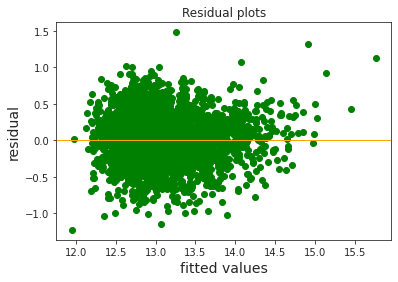

In [0]:
plt.scatter(y_pred, residuals, color='green')
plt.ylabel('residual',fontsize = 14)
plt.xlabel('fitted values',fontsize = 14)
plt.axhline(y= residuals.mean(), color='orange', linewidth=1)
plt.title('Residual plots')
plt.show()

The residuals are not plotted close to the mean of 0.007 hence there is no pattern

**Heteroskedasticity**

In [0]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


**Quantile regression**

In [0]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [0]:
#Regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', final_df)
res = mod.fit(q=.5)


print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4019
Model:                       QuantReg   Bandwidth:                     0.05413
Method:                 Least Squares   Sparsity:                       0.7952
Date:                Sat, 06 Jun 2020   No. Observations:                21606
Time:                        11:52:18   Df Residuals:                    21593
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.3872      0.254     88.067      0.000      21.889      22.885
X[0]          -0.0113      0.004     -3.203      0.001      -0.018      -0.004
X[1]           0.1004      0.006     16.454      0.000       0.088       0.112
X[2]           0.1436      0.007     20.842      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [0]:
final_df1 = final_df.copy()


In [0]:
cols = final_df1.columns[final_df1.dtypes.eq('object')]
cols

Index([], dtype='object')

**Ridge Regression**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [0]:
#determine the strength of the model using best params and best score
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.001}
abs(search.best_score_)

0.09648596815746524

Best score == MSE

In [0]:
# Create another model
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.09729332997902491


In [0]:
# Predict using the model
y_pred=ridge.predict(X)
y_pred

array([12.64260605, 13.06634894, 12.75187363, ..., 12.40048193,
       12.89518962, 12.40619416])

In [0]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,final_df1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.07151575718004452,
 'bedrooms': 0.08029894513228623,
 'condition': 0.2699828303152096,
 'floors': 0.03183056042517174,
 'grade': 0.05847381835384764,
 'price': -0.0046847191618275595,
 'sqft_basement': -0.16601930961703187,
 'sqft_living15': -0.0025162420942476697,
 'view': 0.026559927936795638,
 'waterfront': 0.02831615527408128,
 'yr_built': 0.006551617963123609,
 'yr_renovated': 0.10419436327280285}

The difference between the model of Multiple linear regression and Ridge regression is very small.

perform anothermodel to see if the accuracy level is almost the same as the above models

A model with the highest R-squared score will give us the best target parameters for model prediction in Lasso regression.

**Lasso Regression**

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Step 1
#Scaling the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
#Step 2
# we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note,we are not setting the alpha, it is defined as 1.

# Creating lasso object
lasso = linear_model.Lasso() 

#Step 3
# Fitting the models
lasso.fit(X, y) 

#Step 4
# Print scores, MSE, and coefficients

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.0
lasso MSE: 0.27753701250548485
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#Splitting the data into training and test sets and choose your parameters with GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.4795594742252134
linear score: 0.6518397911983334
lasso MSE: 0.14418802730270713
linear MSE: 0.09645777222609005
lasso best estimator coef: [ 0.          0.00103368  0.          0.          0.00207688  0.
  0.22181649  0.01520951 -0.          0.          0.06406755  0.        ]
linear coef: [-0.00559202  0.07996633  0.0735191   0.02797383  0.02942621  0.0268219
  0.26942638  0.06039635 -0.16472455  0.00472032  0.10295874 -0.00136058]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842.8101283735972, tolerance: 0.4799029962840905
  positive)


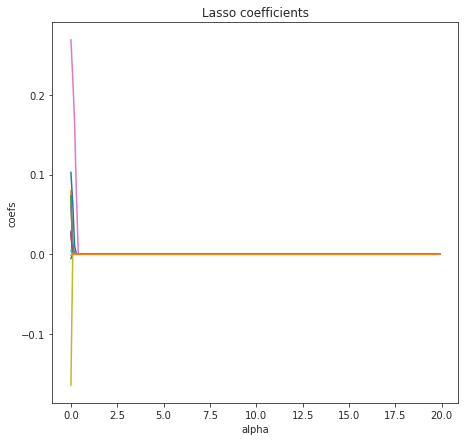

In [0]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

The model complexity increased with very little increase in the values of alpha then decreased.

The line at 0.0 is alarming thus we should  check the coefficients if there is high sparsity

**Elastic Net Regression**

Elastic-net is a mix of both L1 and L2 regularizations.

This regression combines the power of ridge and lasso regression into one algorithm. What this means is that with elastic net the algorithm can remove weak variables altogether as with lasso or to reduce them to close to zero as with ridge. 

In [124]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

0.09728755770798712


This mean standard error score of 0.097 is our benchmark for determining 

 if the elastic net model will be better or worst

In [130]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,final_df1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.06830509158321121,
 'bedrooms': 0.07803019596782428,
 'condition': 0.24804195160155348,
 'floors': 0.030002669422968923,
 'grade': 0.05827805088343515,
 'price': -0.0,
 'sqft_basement': -0.14629768667595508,
 'sqft_living15': -0.0,
 'view': 0.027661525065563318,
 'waterfront': 0.032781298990026665,
 'yr_built': 0.009633993449373919,
 'yr_renovated': 0.10696478375242106}

In [0]:
#  set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [126]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.09834647625984126

In [127]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 0.0983.  
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05, l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.09770469390529675


In [128]:
# Below are the coefficients
 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,final_df1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 0.06830509158321121,
 'bedrooms': 0.07803019596782428,
 'condition': 0.24804195160155348,
 'floors': 0.030002669422968923,
 'grade': 0.05827805088343515,
 'price': -0.0,
 'sqft_basement': -0.14629768667595508,
 'sqft_living15': -0.0,
 'view': 0.027661525065563318,
 'waterfront': 0.032781298990026665,
 'yr_built': 0.009633993449373919,
 'yr_renovated': 0.10696478375242106}

The coefficients are mostly the same. 

Notice that price and sqft_living15 was completely removed from the model in the elastic net version. 

This means that this values was no good to the algorithm. Traditional regression cannot do this.



**Future questions**

1.Which models provide better accuracy for price prediction?

2.Did the nature of the data bias the prediction output since most houses are pricey?


**Possible Solutions**

1.Drop anomalies such as outliers to depict better accuracy results of the model

2.Get data which has widespread variety of prices to avoid biasness of prediction results.

